### 복습

In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import nltk

nltk.download("punkt")
nltk.download('wordnet')

def penn_to_wn(tag):
    if tag.startswith("J"):
        return wn.ADJ
    elif tag.startswith("N"):
        return wn.NOUN
    elif tag.startswith("R"):
        return wn.ADV
    elif tag.startswith("V"):
        return wn.VERB

def words_lemmatizer(pos_tagged_words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word, tag in pos_tagged_words:
        wn_tag = penn_to_wn(tag)
        if wn_tag in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            stem = lemmatizer.lemmatize(word, wn_tag)
            lemmatized_words.append(stem)
        else:
            lemmatized_words.append(word)
    return lemmatized_words

def clean_by_freq(tokenized_words, cut_off_count):
    vocab = Counter(tokenized_words)

    # 빈도수가 cut_off_count 이하인 단어를 제거하는 코드를 작성해 주세요
    uncommon_words = {key for key, value in vocab.items() if value <= cut_off_count}
    cleaned_words = [word for word in tokenized_words if word not in uncommon_words]

    return cleaned_words


def clean_by_len(tokenized_words, cut_off_length):
    cleaned_words = []

    for word in tokenized_words:
        # 길이가 cut_off_length 이하인 단어 제거하는 코드를 작성해 주세요
        if len(word) > cut_off_length:
            cleaned_words.append(word)

    return cleaned_words

def clean_by_freq(tokenized_words, cut_off_count):
    vocab = Counter(tokenized_words)

    # 빈도수가 cut_off_count 이하인 단어를 제거하는 코드를 작성해 주세요
    uncommon_words = {key for key, value in vocab.items() if value <= cut_off_count}
    cleaned_words = [word for word in tokenized_words if word not in uncommon_words]

    return cleaned_words


def clean_by_len(tokenized_words, cut_off_length):
    cleaned_words = []

    for word in tokenized_words:
        # 길이가 cut_off_length 이하인 단어 제거하는 코드를 작성해 주세요
        if len(word) > cut_off_length:
            cleaned_words.append(word)

    return cleaned_words

def pos_tagger(tokenized_sents):
    pos_tagged_words = []

    for sentence in tokenized_sents:
        # 단어 토큰화
        tokenized_words = word_tokenize(sentence)

        # 품사 태깅
        pos_tagged = pos_tag(tokenized_words)
        pos_tagged_words.extend(pos_tagged)

    return pos_tagged_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
nltk.download("stopwords")

# 불용어 제거 함수
def clean_by_stopwords(tokenized_words, stop_words_set):
    cleaned_words = []

    for word in tokenized_words:
        if word not in stop_words_set:
            cleaned_words.append(word)

    return cleaned_words

stopwords_set = set(stopwords.words("english"))

df = pd.read_csv("/content/drive/MyDrive/IMbank_텍스트마이닝/imdb.tsv", sep = '\t')
del df['Unnamed: 0']

df['review'] = df['review'].str.lower() # 소문자 처리
df["sent_tokens"] = df['review'].apply(sent_tokenize) # 문장 토큰화
df["pos_tagged_tokens"] = df['sent_tokens'].apply(pos_tagger) # 형태소
df["lemmatized_tokens"] = df['pos_tagged_tokens'].apply(words_lemmatizer)

df["cleaned_tokens"] = df['lemmatized_tokens'].apply(lambda x : clean_by_len(x, 2)) # 길이가 2 이하인 단어 제거
df['cleaned_tokens']=df['cleaned_tokens'].apply(lambda x : clean_by_stopwords(x, stopwords_set)) # 불용어 제거
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens
0,"watching time chasers, it obvious that it was ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[watch, time, chaser, obvious, make, bunch, fr..."
1,i saw this film about 20 years ago and remembe...,[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[saw, film, year, ago, remember, particularly,..."
2,"minor spoilers in new york, joan barnard (elvi...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[minor, spoiler, new, york, joan, barnard, elv..."
3,i went to see this film with a great deal of e...,[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[see, film, great, deal, excitement, school, d..."
4,"yes, i agree with everyone on this site this m...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[yes, agree, everyone, site, movie, bad, even,..."
5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[jennifer, ehle, sparkle, pride, prejudice.\, ..."
6,amy poehler is a terrific comedian on saturday...,[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[amy, poehler, terrific, comedian, saturday, n..."
7,a plane carrying employees of a large biotech ...,[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, carry, employee, large, biotech, firm,..."
8,"a well made, gritty science fiction movie, it ...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[well, make, gritty, science, fiction, movie, ..."
9,incredibly dumb and utterly predictable story ...,[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[incredibly, dumb, utterly, predictable, story..."


### 단어별로 라벨링

- 빈도가 많이 나온 단어부터 라벨링(중요)


In [21]:
from collections import Counter

words = []
for i in df['cleaned_tokens']:
  # print(i)
  words += i


#len(words)
#words
vocab = Counter(words) # 빈도 분석
vocab = vocab.most_common() # 빈도가 높은순으로 저장
#vocab

word_to_idx = {}
for word, freq in vocab:
    # print(word,freq)
    word_to_idx[word] = len(word_to_idx) +1 # 라벨링할 때 0부터 라벨링하면 안됨 1부터 해야함

word_to_idx

{'movie': 1,
 "n't": 2,
 'film': 3,
 'scene': 4,
 'make': 5,
 'bad': 6,
 'time': 7,
 'one': 8,
 'good': 9,
 'like': 10,
 'even': 11,
 'see': 12,
 'could': 13,
 'reason': 14,
 'end': 15,
 'jim': 16,
 "'re": 17,
 'watch': 18,
 'really': 19,
 'try': 20,
 'character': 21,
 'quastel': 22,
 'would': 23,
 'love': 24,
 'look': 25,
 'monster': 26,
 'dialogue': 27,
 'day': 28,
 'ever': 29,
 'story': 30,
 'script': 31,
 'acting': 32,
 'new': 33,
 'joan': 34,
 'search': 35,
 'back': 36,
 'get': 37,
 'special': 38,
 'two': 39,
 'need': 40,
 'think': 41,
 'call': 42,
 'actor': 43,
 'line': 44,
 'author': 45,
 'easily': 46,
 'idea': 47,
 'though': 48,
 'school': 49,
 'say': 50,
 'still': 51,
 'cut': 52,
 'kill': 53,
 'italy': 54,
 'colleague': 55,
 'maggot': 56,
 'many': 57,
 'way': 58,
 'give': 59,
 'work': 60,
 'minute': 61,
 'jump': 62,
 'radio': 63,
 'stand-up': 64,
 'comedian': 65,
 'anything': 66,
 'girl': 67,
 'want': 68,
 'funny': 69,
 'terrible': 70,
 'ehle': 71,
 'northam': 72,
 'awful': 73

In [22]:
def idx_encoder(tokens, word_to_idx):
    idx_box = []
    for i in tokens:
        idx_box.append(word_to_idx[i])
    return idx_box

In [23]:
df['integer_encoded']=df['cleaned_tokens'].apply(lambda x : idx_encoder(x, word_to_idx))
df

,review,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,integer_encoded
0,"watching time chasers, it obvious that it was ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[watch, time, chaser, obvious, make, bunch, fr...","[18, 7, 196, 197, 5, 198, 86, 199, 200, 201, 8..."
1,i saw this film about 20 years ago and remembe...,[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[saw, film, year, ago, remember, particularly,...","[217, 3, 218, 219, 220, 221, 222, 223, 224, 22..."
2,"minor spoilers in new york, joan barnard (elvi...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[minor, spoiler, new, york, joan, barnard, elv...","[244, 245, 33, 98, 34, 99, 100, 101, 246, 247,..."
3,i went to see this film with a great deal of e...,[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[see, film, great, deal, excitement, school, d...","[12, 3, 124, 306, 307, 49, 125, 11, 9, 86, 308..."
4,"yes, i agree with everyone on this site this m...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[yes, agree, everyone, site, movie, bad, even,...","[350, 351, 139, 140, 1, 6, 11, 42, 1, 352, 1, ..."
5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[jennifer, ehle, sparkle, pride, prejudice.\, ...","[390, 71, 391, 392, 393, 394, 72, 395, 145, 39..."
6,amy poehler is a terrific comedian on saturday...,[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[amy, poehler, terrific, comedian, saturday, n...","[443, 444, 445, 65, 446, 151, 133, 152, 1, 2, ..."
7,a plane carrying employees of a large biotech ...,[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, carry, employee, large, biotech, firm,...","[162, 134, 482, 483, 484, 485, 486, 163, 487, ..."
8,"a well made, gritty science fiction movie, it ...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[well, make, gritty, science, fiction, movie, ...","[81, 5, 193, 627, 628, 1, 13, 118, 629, 630, 6..."
9,incredibly dumb and utterly predictable story ...,[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[incredibly, dumb, utterly, predictable, story...","[649, 650, 138, 651, 30, 652, 653, 67, 59, 24,..."


In [27]:
max_len = 0

for i in df['integer_encoded']:
    # print(len(i)) # 유사도를 구하기위해 길이가 비슷해야하는데 길이가 다르다는 것을 확인할 수 있다.
    if len(i) >=max_len: # 최대 길이 확인
        max_len = len(i)

max_len

387

In [29]:
for tokens in df['integer_encoded']:
    # print(tokens)
    while len(tokens) < max_len: # max_len 길이 보다 작으면 0으로 다 채우겠다. 그래서 0이 있으면 안된다.
        tokens.append(0)

df

,review,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,integer_encoded
0,"watching time chasers, it obvious that it was ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[watch, time, chaser, obvious, make, bunch, fr...","[18, 7, 196, 197, 5, 198, 86, 199, 200, 201, 8..."
1,i saw this film about 20 years ago and remembe...,[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[saw, film, year, ago, remember, particularly,...","[217, 3, 218, 219, 220, 221, 222, 223, 224, 22..."
2,"minor spoilers in new york, joan barnard (elvi...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[minor, spoiler, new, york, joan, barnard, elv...","[244, 245, 33, 98, 34, 99, 100, 101, 246, 247,..."
3,i went to see this film with a great deal of e...,[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[see, film, great, deal, excitement, school, d...","[12, 3, 124, 306, 307, 49, 125, 11, 9, 86, 308..."
4,"yes, i agree with everyone on this site this m...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[yes, agree, everyone, site, movie, bad, even,...","[350, 351, 139, 140, 1, 6, 11, 42, 1, 352, 1, ..."
5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[jennifer, ehle, sparkle, pride, prejudice.\, ...","[390, 71, 391, 392, 393, 394, 72, 395, 145, 39..."
6,amy poehler is a terrific comedian on saturday...,[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[amy, poehler, terrific, comedian, saturday, n...","[443, 444, 445, 65, 446, 151, 133, 152, 1, 2, ..."
7,a plane carrying employees of a large biotech ...,[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, carry, employee, large, biotech, firm,...","[162, 134, 482, 483, 484, 485, 486, 163, 487, ..."
8,"a well made, gritty science fiction movie, it ...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[well, make, gritty, science, fiction, movie, ...","[81, 5, 193, 627, 628, 1, 13, 118, 629, 630, 6..."
9,incredibly dumb and utterly predictable story ...,[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[incredibly, dumb, utterly, predictable, story...","[649, 650, 138, 651, 30, 652, 653, 67, 59, 24,..."


In [31]:
for i in df['integer_encoded']:
    # print(len(i)) max_len까지 늘어 났는지 확인
    # print(i) 비워있는 값을 0 으로 채웠는지 확인

[18, 7, 196, 197, 5, 198, 86, 199, 200, 201, 8, 28, 3, 49, 50, 202, 87, 203, 204, 88, 5, 19, 6, 1, 205, 10, 29, 50, 51, 15, 5, 19, 6, 1, 206, 30, 6, 31, 207, 32, 208, 89, 209, 210, 211, 212, 90, 213, 52, 214, 8, 23, 215, 3, 216, 91, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### 감성분석

- wordnet(감성사전) : 단어랑 의미

In [32]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

word = wn.synsets("lead") # lead의대한 뜻
# synsets : 그 단어가 가질 수 있는 모든 의미(Synset)를 반환해. Synset은 단어의 특정 의미를 정의하고, 그 의미에 속하는 단어들을 묶은 그룹
word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('lead.n.01'),
 Synset('lead.n.02'),
 Synset('lead.n.03'),
 Synset('lead.n.04'),
 Synset('lead.n.05'),
 Synset('lead.n.06'),
 Synset('lead.n.07'),
 Synset('star.n.04'),
 Synset('lead.n.09'),
 Synset('tip.n.03'),
 Synset('lead.n.11'),
 Synset('spark_advance.n.01'),
 Synset('leash.n.01'),
 Synset('lead.n.14'),
 Synset('lead.n.15'),
 Synset('jumper_cable.n.01'),
 Synset('lead.n.17'),
 Synset('lead.v.01'),
 Synset('leave.v.07'),
 Synset('lead.v.03'),
 Synset('lead.v.04'),
 Synset('lead.v.05'),
 Synset('run.v.03'),
 Synset('head.v.02'),
 Synset('lead.v.08'),
 Synset('contribute.v.03'),
 Synset('conduct.v.02'),
 Synset('go.v.25'),
 Synset('precede.v.04'),
 Synset('run.v.23'),
 Synset('moderate.v.01')]

In [36]:
# wn.synsets("lead.n.01").definition() # 단어의 의미
# lead의 첫 번째 명사 의미를 찾고 정의를 출력
synset = wn.synset("lead.n.01")
print(synset.definition())

an advantage held by a competitor in a race


In [43]:
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')

# 먼저 WordNet에서 'happy'의 Synset을 찾음
synset = wn.synset('happy.a.01')  # 'happy'의 첫 번째 형용사 의미

# SentiWordNet에서 해당 Synset의 감정 점수를 가져옴
senti_synset = swn.senti_synset(synset.name())

# 긍정 점수와 부정 점수의 차이 계산
sentiment_score = senti_synset.pos_score() - senti_synset.neg_score()
sentiment_score

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


0.875

In [44]:
a = wn.synsets("hard",wn.ADJ)[0]
b = wn.synsets("hard",wn.ADV)[0]

In [46]:
a2=swn.senti_synset(a.name())
b2=swn.senti_synset(b.name())

In [47]:
# 품사에 따라서 점수가 다를 수 있다.
print(a2)
print(b2)

<difficult.a.01: PosScore=0.0 NegScore=0.75>
<hard.r.01: PosScore=0.125 NegScore=0.125>


In [53]:
pos_tagged_words = df['pos_tagged_tokens'][0]
# pos_tagged_words
score = 0
for word,tag in pos_tagged_words:
    tag = penn_to_wn(tag)
    # print(tag)
    if tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
        continue
    if not wn.synsets(word, tag):
        continue
    else:
        synset = wn.synsets(word, tag)

    synset = synset[0]
    # print(synset)
    senti = swn.senti_synset(synset.name())
    # print(senti)
    senti2 = senti.pos_score() - senti.neg_score()
    # print(senti2)

    score +=senti2

print(score) # 음수로 나오기에 이 리뷰는 부정적으로 쓰였다라고 확인 가능


-0.25


### imdb text data 감성 분석

In [56]:
# 감정 점수를 계산하는 함수
def calculate_sentiment_score(pos_tagged_tokens):
    score = 0
    for word, tag in pos_tagged_tokens:
        # Penn Treebank 태그를 WordNet 태그로 변환
        tag = penn_to_wn(tag)
        if tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue
        # Synset이 있는지 확인
        if not wn.synsets(word, tag):
            continue
        else:
            synset = wn.synsets(word, tag)
        synset = synset[0]  # 첫 번째 Synset 선택
        senti = swn.senti_synset(synset.name())  # SentiSynset 가져오기
        senti_score = senti.pos_score() - senti.neg_score()  # 감정 점수 계산
        score += senti_score
    return score

# 감성 분석 점수를 계산한 후, DataFrame에 score 열 추가
df['score'] = df['pos_tagged_tokens'].apply(calculate_sentiment_score)

# 결과 확인
df[['cleaned_tokens', 'score']]

,cleaned_tokens,score
0,"[watch, time, chaser, obvious, make, bunch, fr...",-0.250
1,"[saw, film, year, ago, remember, particularly,...",-1.500
2,"[minor, spoiler, new, york, joan, barnard, elv...",-2.250
3,"[see, film, great, deal, excitement, school, d...",-0.500
4,"[yes, agree, everyone, site, movie, bad, even,...",3.000
5,"[jennifer, ehle, sparkle, pride, prejudice.\, ...",6.750
6,"[amy, poehler, terrific, comedian, saturday, n...",0.750
7,"[plane, carry, employee, large, biotech, firm,...",8.750
8,"[well, make, gritty, science, fiction, movie, ...",4.500
9,"[incredibly, dumb, utterly, predictable, story...",-1.125


#### 강사님 코드

In [57]:
# df에 감성점수 열 추가하기!

def check_senti_score(tokens):
    pos_tagged_words = tokens
    score = 0
    for word, tag in pos_tagged_words:
        tag = penn_to_wn(tag)
        if tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
            continue
        if not wn.synsets(word, tag):
            continue
        else:
            synsets = wn.synsets(word, tag)

        synset = synsets[0]
        senti = swn.senti_synset(synset.name())
        senti2 = senti.pos_score() - senti.neg_score()

        score += senti2

    return score

In [59]:
del df['score']

In [60]:
df['Senti Score'] = df['pos_tagged_tokens'].apply(check_senti_score)
df

,review,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,integer_encoded,Senti Score
0,"watching time chasers, it obvious that it was ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[watch, time, chaser, obvious, make, bunch, fr...","[18, 7, 196, 197, 5, 198, 86, 199, 200, 201, 8...",-0.250
1,i saw this film about 20 years ago and remembe...,[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[saw, film, year, ago, remember, particularly,...","[217, 3, 218, 219, 220, 221, 222, 223, 224, 22...",-1.500
2,"minor spoilers in new york, joan barnard (elvi...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[minor, spoiler, new, york, joan, barnard, elv...","[244, 245, 33, 98, 34, 99, 100, 101, 246, 247,...",-2.250
3,i went to see this film with a great deal of e...,[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[see, film, great, deal, excitement, school, d...","[12, 3, 124, 306, 307, 49, 125, 11, 9, 86, 308...",-0.500
4,"yes, i agree with everyone on this site this m...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[yes, agree, everyone, site, movie, bad, even,...","[350, 351, 139, 140, 1, 6, 11, 42, 1, 352, 1, ...",3.000
5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[jennifer, ehle, sparkle, pride, prejudice.\, ...","[390, 71, 391, 392, 393, 394, 72, 395, 145, 39...",6.750
6,amy poehler is a terrific comedian on saturday...,[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[amy, poehler, terrific, comedian, saturday, n...","[443, 444, 445, 65, 446, 151, 133, 152, 1, 2, ...",0.750
7,a plane carrying employees of a large biotech ...,[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, carry, employee, large, biotech, firm,...","[162, 134, 482, 483, 484, 485, 486, 163, 487, ...",8.750
8,"a well made, gritty science fiction movie, it ...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[well, make, gritty, science, fiction, movie, ...","[81, 5, 193, 627, 628, 1, 13, 118, 629, 630, 6...",4.500
9,incredibly dumb and utterly predictable story ...,[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[incredibly, dumb, utterly, predictable, story...","[649, 650, 138, 651, 30, 652, 653, 67, 59, 24,...",-1.125


### 감성분석 라이브러리

In [61]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # 감성사전 다운로드

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [62]:
analyzer = SentimentIntensityAnalyzer() # 모델 가져오기

text1 = "This is a great moive!" #긍정
text2 = "This is a terrible moive!" # 부정
text3 = "This movie was just okay." # 조금 괜찮다.

print(analyzer.polarity_scores(text1) )
print(analyzer.polarity_scores(text2) )
print(analyzer.polarity_scores(text3) )
# compound가 1의 가까우면 긍정 -1의 가까우면 부정이라는 뜻

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5255}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}


In [65]:
def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)['compound']
    return scores

df["Varder Score"]=df['review'].apply(vader_sentiment) # 전처리 안하고 Varder score 계산
df

,review,sent_tokens,pos_tagged_tokens,lemmatized_tokens,cleaned_tokens,integer_encoded,Senti Score,Varder Score
0,"watching time chasers, it obvious that it was ...","[watching time chasers, it obvious that it was...","[(watching, VBG), (time, NN), (chasers, NNS), ...","[watch, time, chaser, ,, it, obvious, that, it...","[watch, time, chaser, obvious, make, bunch, fr...","[18, 7, 196, 197, 5, 198, 86, 199, 200, 201, 8...",-0.250,-0.9095
1,i saw this film about 20 years ago and remembe...,[i saw this film about 20 years ago and rememb...,"[(i, NN), (saw, VBD), (this, DT), (film, NN), ...","[i, saw, this, film, about, 20, year, ago, and...","[saw, film, year, ago, remember, particularly,...","[217, 3, 218, 219, 220, 221, 222, 223, 224, 22...",-1.500,-0.9694
2,"minor spoilers in new york, joan barnard (elvi...","[minor spoilers in new york, joan barnard (elv...","[(minor, JJ), (spoilers, NNS), (in, IN), (new,...","[minor, spoiler, in, new, york, ,, joan, barna...","[minor, spoiler, new, york, joan, barnard, elv...","[244, 245, 33, 98, 34, 99, 100, 101, 246, 247,...",-2.250,-0.2794
3,i went to see this film with a great deal of e...,[i went to see this film with a great deal of ...,"[(i, JJ), (went, VBD), (to, TO), (see, VB), (t...","[i, go, to, see, this, film, with, a, great, d...","[see, film, great, deal, excitement, school, d...","[12, 3, 124, 306, 307, 49, 125, 11, 9, 86, 308...",-0.500,-0.9707
4,"yes, i agree with everyone on this site this m...","[yes, i agree with everyone on this site this ...","[(yes, UH), (,, ,), (i, JJ), (agree, VBP), (wi...","[yes, ,, i, agree, with, everyone, on, this, s...","[yes, agree, everyone, site, movie, bad, even,...","[350, 351, 139, 140, 1, 6, 11, 42, 1, 352, 1, ...",3.000,0.8444
5,"jennifer ehle was sparkling in \""pride and pre...","[jennifer ehle was sparkling in \""pride and pr...","[(jennifer, NN), (ehle, NN), (was, VBD), (spar...","[jennifer, ehle, be, sparkle, in, \, '', pride...","[jennifer, ehle, sparkle, pride, prejudice.\, ...","[390, 71, 391, 392, 393, 394, 72, 395, 145, 39...",6.750,0.9494
6,amy poehler is a terrific comedian on saturday...,[amy poehler is a terrific comedian on saturda...,"[(amy, JJ), (poehler, NN), (is, VBZ), (a, DT),...","[amy, poehler, be, a, terrific, comedian, on, ...","[amy, poehler, terrific, comedian, saturday, n...","[443, 444, 445, 65, 446, 151, 133, 152, 1, 2, ...",0.750,0.8473
7,a plane carrying employees of a large biotech ...,[a plane carrying employees of a large biotech...,"[(a, DT), (plane, NN), (carrying, VBG), (emplo...","[a, plane, carry, employee, of, a, large, biot...","[plane, carry, employee, large, biotech, firm,...","[162, 134, 482, 483, 484, 485, 486, 163, 487, ...",8.750,0.9885
8,"a well made, gritty science fiction movie, it ...","[a well made, gritty science fiction movie, it...","[(a, DT), (well, NN), (made, VBN), (,, ,), (gr...","[a, well, make, ,, gritty, science, fiction, m...","[well, make, gritty, science, fiction, movie, ...","[81, 5, 193, 627, 628, 1, 13, 118, 629, 630, 6...",4.500,0.9887
9,incredibly dumb and utterly predictable story ...,[incredibly dumb and utterly predictable story...,"[(incredibly, RB), (dumb, JJ), (and, CC), (utt...","[incredibly, dumb, and, utterly, predictable, ...","[incredibly, dumb, utterly, predictable, story...","[649, 650, 138, 651, 30, 652, 653, 67, 59, 24,...",-1.125,-0.7375


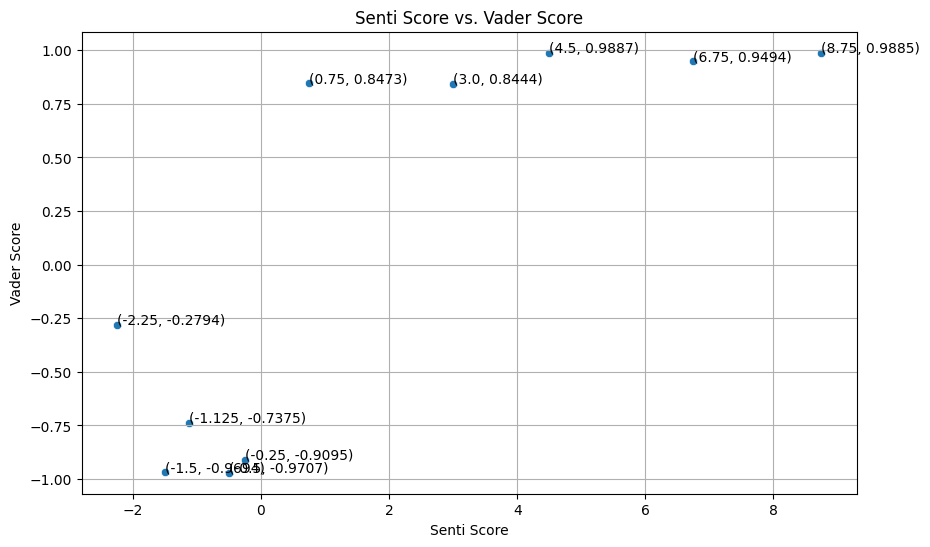

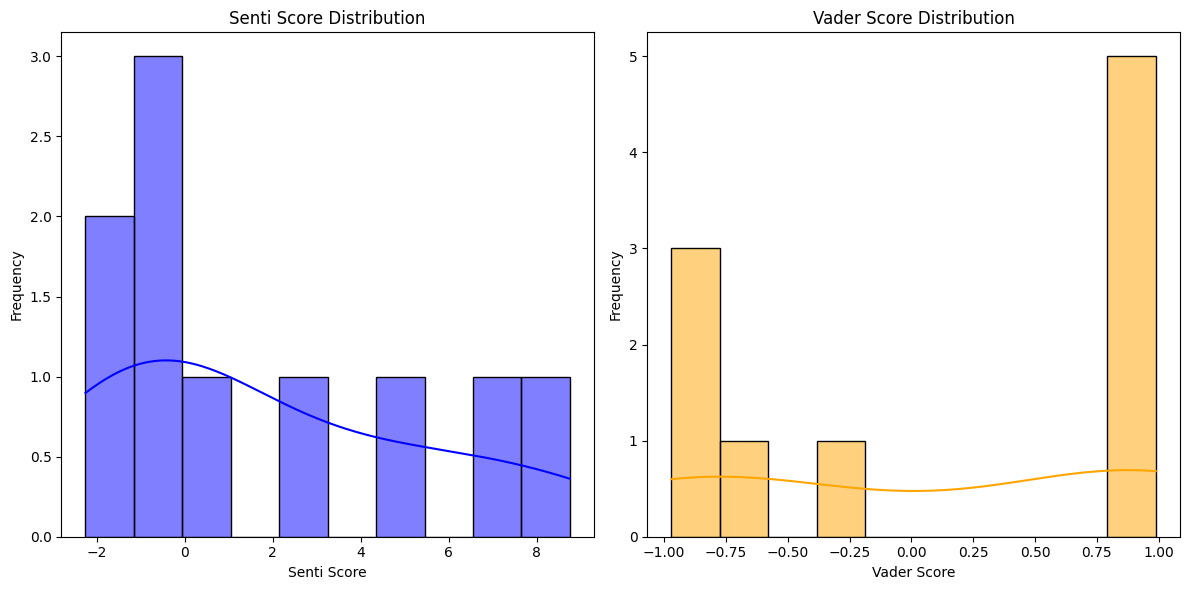

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 두 점수 간의 관계를 시각화
plt.figure(figsize=(10, 6))

# 산점도
sns.scatterplot(data=df, x='Senti Score', y='Varder Score')

# 그래프 제목과 라벨 추가
plt.title('Senti Score vs. Vader Score')
plt.xlabel('Senti Score')
plt.ylabel('Vader Score')

# 그리드 추가
plt.grid()

# 각 점의 값 추가
for i in range(len(df)):
    plt.text(df['Senti Score'][i], df['Varder Score'][i], f'({df["Senti Score"][i]}, {df["Varder Score"][i]})')

plt.show()

# 분포 히스토그램
plt.figure(figsize=(12, 6))

# Senti Score 분포
plt.subplot(1, 2, 1)
sns.histplot(df['Senti Score'], kde=True, color='blue', bins=10)
plt.title('Senti Score Distribution')
plt.xlabel('Senti Score')
plt.ylabel('Frequency')

# Vader Score 분포
plt.subplot(1, 2, 2)
sns.histplot(df['Varder Score'], kde=True, color='orange', bins=10)
plt.title('Vader Score Distribution')
plt.xlabel('Vader Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 한국어 감성분석

In [18]:
import pandas as pd
knu = pd.read_csv("/content/drive/MyDrive/IMbank_텍스트마이닝/knu_sentiment_lexicon.csv")
knu
# 이 파일은 점수가 다 매겨져있음 - 출처 군산대학교

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [19]:
knu_dic=dict(zip(knu['word'],knu['polarity'])) # 딕셔너리로 만들기
knu_dic

{'ㅡㅡ': -1,
 'ㅠㅠ': -1,
 'ㅠ_ㅠ': -1,
 'ㅠ': -1,
 'ㅜㅡ': -1,
 'ㅜㅜ': -1,
 'ㅜ_ㅜ': -1,
 'ㅜ.ㅜ': -1,
 'ㅜ': -1,
 'ㅗ': -1,
 '힘찬 기운이': 2,
 '힘찬': 2,
 '힘차다': 2,
 '힘차고 튼튼하다': 2,
 '힘차고 대단한': 2,
 '힘차고': 2,
 '힘차게 진행되는': 2,
 '힘차게 일어남': 1,
 '힘차게': 2,
 '힘이나 권세 위력 따위가 없이': -1,
 '힘이 있다': 1,
 '힘이 있고': 1,
 '힘이 있게': 1,
 '힘이 없음을': -1,
 '힘이 없어서': -1,
 '힘이 없어': -1,
 '힘이 없다': -1,
 '힘이 없는 사람을': -1,
 '힘이 없는': -1,
 '힘이 없거나': -1,
 '힘이 약해진': -1,
 '힘이 빠져': -1,
 '힘이 뛰어나다': 1,
 '힘이 들거나': -1,
 '힘이 되어': 1,
 '힘이 다 빠져': -1,
 '힘이 기운차게': 2,
 '힘이 강하다': 2,
 '힘이 가득하고': 1,
 '힘을 합하여': 1,
 '힘을 잃고': -1,
 '힘을 잃게': -1,
 '힘을 잃거나': -1,
 '힘을 못 쓰게': -1,
 '힘을 들이고': -1,
 '힘을 들였으나': -1,
 '힘을 다함': 1,
 '힘을 다하여': 1,
 '힘을 다하다': 1,
 '힘을 가지고': 1,
 '힘에 부치는 데가 있다': -2,
 '힘에 부쳐': -2,
 '힘에 벅차': -2,
 '힘에 눌려': -2,
 '힘에 겹게': -2,
 '힘에 겹거나': -2,
 '힘에 겨워': -2,
 '힘없이 흐느적흐느적': -1,
 '힘없이 행동하다': -1,
 '힘없이 행동하는': -1,
 '힘없이 처질': -1,
 '힘없이 주저앉는': -1,
 '힘없이 앉다': -1,
 '힘없이 쑥쑥': -1,
 '힘없이 몰아쉬는': -1,
 '힘없이 넘어지거나': -1,
 '힘없이 끌려가는': -1,
 '힘없이 거꾸러지는': -1,
 '힘없이': -1,
 '힘없은 걸음

In [20]:
text = "이 제품 정말 좋아연!"

score = 0
for key, value in knu_dic.items():
    # print(key,value)
    if key in text: # 만약 text가 key 값에 들어가 있다면
        score +=value * text.count(key)

score # 양수가 나오기에 긍정

3

In [21]:
# 사용자 정의함수
def sentiment_analysis(text):
    score = 0
    for key, value in knu_dic.items():
        if key in text:
            score += value * text.count(key)
    return score

In [22]:
sentiment_analysis(text)

3

### 인터파크 감성분석 (군산대 감성사전 활용)





In [23]:
df = pd.read_excel('/content/drive/MyDrive/IMbank_텍스트마이닝/인터파크 리뷰 데이터.xlsx')
df['TEXT']=df['제목'] + " " + df['내용']
df['감성점수']= df['TEXT'].apply(sentiment_analysis)
df.sort_values('감성점수')

,제목,내용,TEXT,감성점수
167,너무 쓸쓸한 ...,"죽음과 이별의 아픔으로, 시대와 인간과 자연과 그 모든 것을 바라보는 뭉크의 고립과...","너무 쓸쓸한 ... 죽음과 이별의 아픔으로, 시대와 인간과 자연과 그 모든 것을 바...",-19
132,인생의 애환을 특별한 구도로 표현하고픈 뭉크.,평일 관람이라 좋았습니다. 노르웨에 출신의 화가 뭉크의 일생을 알아볼 수 있어서 좋...,인생의 애환을 특별한 구도로 표현하고픈 뭉크. 평일 관람이라 좋았습니다. 노르웨에 ...,-17
280,뭉크씨가 내게 적잖은 충격을 주셨어요~,그동안 참 많은 화가의 그림을 보러 다녔고 좋아하는 화가도 참 많다고 자부하는 내게...,뭉크씨가 내게 적잖은 충격을 주셨어요~ 그동안 참 많은 화가의 그림을 보러 다녔고 ...,-16
279,또 만나요~ 꼭~,그동안 참 많은 화가의 그림을 보러 다녔고 좋아하는 화가도 참 많다고 자부하는 내게...,또 만나요~ 꼭~ 그동안 참 많은 화가의 그림을 보러 다녔고 좋아하는 화가도 참 많...,-14
162,기법이 아닌 서사를 보여줬더라면..,"EBS에서 정우철 전시해설가가 뭉크의 이야기를 설명해주신 것을 듣고, 기대하는 마음...",기법이 아닌 서사를 보여줬더라면.. EBS에서 정우철 전시해설가가 뭉크의 이야기를 ...,-13
...,...,...,...,...
351,뭉크를 한국에서 보다니...,절규를 한국에서 실제로 보게되나니 정말 감동이었다.\n관람하기 편하게 전시되어 쾌적했다,뭉크를 한국에서 보다니... 절규를 한국에서 실제로 보게되나니 정말 감동이었다.\n...,9
48,훈남 에드바르트 뭉크.,"오슬로 뭉크 미술관을 가보려고 했는데,\n국내에서 이런 훌륭한 작품들을 만나 볼 수...","훈남 에드바르트 뭉크. 오슬로 뭉크 미술관을 가보려고 했는데,\n국내에서 이런 훌륭...",11
5,1년만의 예술의전당,행복한추억 만들어주신 예술의전당 감사드리며...\n뭉크전시 잘보고 즐겁게보고 왔습니...,1년만의 예술의전당 행복한추억 만들어주신 예술의전당 감사드리며...\n뭉크전시 잘보...,11
184,오랫만에 좋은 전시 관람,40년 지기 친구들과 셋이서 오랫만에 좋은 전시를 보게 되어 가슴설레고 기뻣습니다....,오랫만에 좋은 전시 관람 40년 지기 친구들과 셋이서 오랫만에 좋은 전시를 보게 되...,12


### OpenAI API(GPT) 사용

- chat GPT를 python과 연결하여 자동화 프로그램 생성

-Python + ChatGPT

1) 저렴하다.

2) 공식 사이트보다 더 높은 버전 사용 가능

In [2]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00


In [1]:
from openai import OpenAI


openai = OpenAI(api_key = "") # api key 입력

In [9]:
# box =[{"role" : "system","content":"넌 헬스트레이너야."},
#       {"role":"user",    "content":"근육량 키우기 가장 효율적인 운동 루틴은 뭐야?"}]

box =[{"role" : "system","content":"넌 헬스트레이너야."}]

while True:
    a = input("입력 : ")
    if a =="종료":
        break

    box.append({"role":"user",    "content":a})

    model = openai.chat.completions.create(
        model = "chatgpt-4o-latest",
        messages = box
    )

    result=model.choices[0].message.content
    box.append({"role":"assistant","content":result})

    print(result)


입력 : 근육량 증가에 가장 비효율적인 유산소 종목은 뭐야?
근육량 증가를 목표로 할 때, **장시간 지속되는 저강도 유산소 운동**이 상대적으로 비효율적일 수 있습니다. 그중에서도 **장거리 달리기**(마라톤과 같은 긴 거리의 조깅)가 특히 해당됩니다.

이유는 다음과 같습니다:

1. **근손실 위험:** 장시간 동안 저강도로 지속하는 유산소 운동은 신체가 에너지를 소비하기 위해 지방뿐만 아니라 일부 근육 조직을 분해하는 경향이 있습니다. 이것이 근육량 증가에 부정적인 영향을 미칠 수 있습니다.

2. **호르몬 변화:** 장시간 유산소 운동은 코티솔(스트레스 호르몬)의 분비를 늘릴 수 있습니다. 코티솔은 근육 분해를 촉진하고, 장기적으로 근육 성장을 저해할 수 있습니다.

3. **칼로리 소모:** 장시간 운동을 하면 근육 성장을 지원하기 위한 추가 칼로리 섭취가 더 많이 필요하게 됩니다. 이 때문에 체중을 유지하거나 증가시키려는 사람에게는 필요 이상의 칼로리 소모가 불리할 수 있습니다.

반면에, 근육량을 증가시키고자 한다면 **짧고 강도 높은 유산소 운동**(예: HIIT, 스프린트, 싸이클 인터벌 등)을 선택하는 것이 좋습니다. 이런 운동들은 심혈관 건강을 유지하면서도 근육 발달에 큰 해를 끼치지 않으며, 오히려 근육을 보존할 수 있는 경향이 있습니다.

결론적으로, 근육량 증가에 가장 비효율적인 유산소 운동은 **장시간의 저강도 유산소 운동**이며, 그중에서도 특히 **장거리 달리기**가 해당됩니다.
입력 : 그럼 러너스 하이는 안좋은거야?
"**러너스 하이**"는 달리기와 같은 중등도 이상의 유산소 운동을 일정 시간 동안 지속할 때 발생하는 기분 좋은 상태를 말합니다. 이는 주로 **엔돌핀**과 **엔도카나비노이드**라는 물질들이 분비되면서 발생하는 현상으로, 몸과 정신이 가벼워지고 스트레스가 해소되는 듯한 느낌을 받습니다.

러너스 하이 자체는 매우 긍정적인 현상입니다. 여기에는 여러가지 장점이 있습니다:

1. **정신 건강 개선:** 러너스

In [10]:
model = openai.images.generate(
    model="dall-e-3",
    prompt="시냇가에서 생선을 잡고 놀고있는 아기 고양이를 일본 스타일의 겨울 감성으로 귀엽게 그려줘.",
    size="1024x1024",

    n=1,
)

In [11]:
model

ImagesResponse(created=1728620576, data=[Image(b64_json=None, revised_prompt='A cute kitten is playing and catching fish by a stream, depicted in a charming winter atmosphere. The scene is reminiscent of the traditional Japanese art style, distinguished by carefully detailed depictions of animals, natural landscapes, and the subtle use of colors. The kitten is fully engrossed in its playful activity, its soft fur lightly dusted with snow. The stream is beautifully rendered, fishes are swimming in the crystal-clear water which shimmers in the winter light. The snow-covered trees and landscape around provide a serene backdrop to this heartwarming scene.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-qpYXGgVo15NajEHXhTWkFZXf/user-y0slHHNIFzBcpLrWtb314cNl/img-25W5KR1DwhAe08Kicu8BMBTo.png?st=2024-10-11T03%3A22%3A56Z&se=2024-10-11T05%3A22%3A56Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c8

In [12]:
model = openai.images.create_variation(
    model = "dall-e-2",
    image = open("/content/drive/MyDrive/IMbank_텍스트마이닝/피카소.png", "rb"),
    n=1,
    size="1024x1024"
)

In [13]:
model

ImagesResponse(created=1728620914, data=[Image(b64_json=None, revised_prompt=None, url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-qpYXGgVo15NajEHXhTWkFZXf/user-y0slHHNIFzBcpLrWtb314cNl/img-heaLFefh0OIeMESVJRbZxTTf.png?st=2024-10-11T03%3A28%3A34Z&se=2024-10-11T05%3A28%3A34Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-11T04%3A07%3A23Z&ske=2024-10-12T04%3A07%3A23Z&sks=b&skv=2024-08-04&sig=udCfhLB3gSwfPuTyFVpThOZbxm/CtEf/WLEtolwcYvw%3D')])

#### GPT로 감성분석

In [25]:
df2 = df.head(10)


total = []

for i in df2['TEXT']:

    box = [{'role' : "system", "content" : "내가 리뷰 댓글 내용을 보여주면 그 내용이 긍정이면 '긍정', 부정이면 '부정', 중립이면 '중립' 이라고 단답으로 대답해줘."},
           {'role' : "user", "content" : i}]

    model = openai.chat.completions.create(
        model = "chatgpt-4o-latest",
        messages = box
    )

    result = model.choices[0].message.content
    total.append(result)

df2['GPT감성분석결과'] = total
df2

<ipython-input-25-f3c0f99440cd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['GPT감성분석결과'] = total


,제목,내용,TEXT,감성점수,GPT감성분석결과
0,기대만큼 좋았던 전시회,전시회를 본지 시간이 좀 지나서 감동이 좀 가라앉기는 했지만 작품과 작가의 인생을 ...,기대만큼 좋았던 전시회 전시회를 본지 시간이 좀 지나서 감동이 좀 가라앉기는 했지만...,7,긍정
1,생각보다 별로였어요.,노르웨이 뭉크미술관을 다녀와서 그런가... 같은 그림이 여러개 전시되어 있다보니 전...,생각보다 별로였어요. 노르웨이 뭉크미술관을 다녀와서 그런가... 같은 그림이 여러개...,-2,부정
2,볼게 많아서 좋더라고요,근데 다음선약시간 빠듯하게 와서ㅠ 다시 관람하러 갈거지 말입니다. 뭉크는 사랑입니다...,볼게 많아서 좋더라고요 근데 다음선약시간 빠듯하게 와서ㅠ 다시 관람하러 갈거지 말입...,-4,긍정
3,워낙 유명한 화가,워낙 유명한 화가라 기대하고 갔는데\n그림이 전체적으로 어두운 느낌이라 전시를 보고...,워낙 유명한 화가 워낙 유명한 화가라 기대하고 갔는데\n그림이 전체적으로 어두운 느...,-5,부정
4,그럭저럭,"뭉크의 연대기와 작품을 볼수있는건 좋았지만, 작품설명문과 글씨가 다소 작고, 전시그...","그럭저럭 뭉크의 연대기와 작품을 볼수있는건 좋았지만, 작품설명문과 글씨가 다소 작고...",1,부정
5,1년만의 예술의전당,행복한추억 만들어주신 예술의전당 감사드리며...\n뭉크전시 잘보고 즐겁게보고 왔습니...,1년만의 예술의전당 행복한추억 만들어주신 예술의전당 감사드리며...\n뭉크전시 잘보...,11,긍정
6,많은 걸 느낄 수 있었던 시간,뭉크를 좋아하지 않아도 관람할만한 가치가 있는 전시라 생각하는데 아무래도 평일인데도...,많은 걸 느낄 수 있었던 시간 뭉크를 좋아하지 않아도 관람할만한 가치가 있는 전시라...,1,중립
7,공간적 여유가 조금 아쉬웠지만 좋았습니다.,뭉크의 일생을 따라 구분연출된 다양하고 좋은 작품들을 볼 수 있는 좋은 기회였습니다...,공간적 여유가 조금 아쉬웠지만 좋았습니다. 뭉크의 일생을 따라 구분연출된 다양하고 ...,-1,중립
8,뭉크전,뭉크 개인의 예술사에서 여러 예술사적 시도를 보여준 작품 전시가 너무 멋졌습니다. ...,뭉크전 뭉크 개인의 예술사에서 여러 예술사적 시도를 보여준 작품 전시가 너무 멋졌습...,6,긍정
9,좋아요,뭉크의 고난과 극복이 우리내삶과 닮아있다고해서\n인기가 많다고 하던데\n아직 그정도...,좋아요 뭉크의 고난과 극복이 우리내삶과 닮아있다고해서\n인기가 많다고 하던데\n아직...,2,중립
